In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from dpsolver import DPSolver
from agent import Agent, TargetAgent, SamplingAgent
from utils import *
from models import QNetwork, PolicyNetwork
from envs import CakeEatEnv

In [2]:
config_name = 'config'
cfg = configObj(config_name,verbose=False)
env = CakeEatEnv(cfg)
OPTIMAL_ACTION = env.c_star(1)
lr_scheme = LR_SCHEME(cfg)

In [3]:
dp = DPSolver(cfg)
dp.solve(env.c_star)

# this func plots the critic model performance given the optimal actor
def plot(ax, model, label):
    s = torch.linspace(cfg.ENV_STATE_SPACE_L, cfg.ENV_STATE_SPACE_H, 100).unsqueeze(-1)
    a = env.c_star
    with torch.no_grad():
        v = model(s, a(s))
    s = s.squeeze(-1).detach().numpy()
    v = v.squeeze(-1).detach().numpy()
    ax.plot(s, v, label=label);
    ax.legend(fontsize=20);


Converged in 373 iterations.


# Value Function Evaluation

## grid point sampling (B=100)

In [ ]:
critic = QNetwork(state_dim=env.observation_space.shape[0],
                  action_dim=env.action_space.shape[0],
                  hidden_dim=cfg.CRITIC_HIDDEN_DIM,
                  num_hidden_layer=cfg.CRITIC_NUM_HIDDEN_LAYER,
                  activate=cfg.CRITIC_ACTIVATE,
                  batch_norm=cfg.CRITIC_BATCH_NORM,
                  weight_init=cfg.CRITIC_WEIGHT_INIT)

actor = env.c_star

critic_optim = optim.Adam(critic.parameters(), lr=cfg.MAX_CRITIC_LR)
actor_optim = _

agent = TargetAgent(env=env, critic=critic, actor=actor, critic_optim=critic_optim, actor_optim=actor_optim)

for i in range(5000):
    s = env.gen_states(sampling=False, B=100)
    a = agent.actor(s)
    r, s_ = env.transit(s, a, 10)
    a_ = agent.actor(s_)
#     data = [s, a, r, s_, a_, cfg.ENV_TRANSITION_NUM_STEPS]
    data = [s, a, r, s_, a_, 10]
    train_q_loss= agent.update_critic(data, lr_scheme(i)[0])
    if i % cfg.REPORT_PER_ITERATION == 0:
        print(f"Epoch {i}: lr {lr_scheme(i)[0]:.4f}, train loss {train_q_loss:.6f}\n")
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot(ax, dp, label='Dynamic Programming')
plot(ax, agent.critic, label='Neural Network')
s = np.linspace(cfg.ENV_STATE_SPACE_L, cfg.ENV_STATE_SPACE_H, 200)
ax.plot(s, env.v_star(s), label='True V')
ax.legend(fontsize=20);

## random sampling (B=32)

Epoch 0: lr 0.0100, train loss 10986.606445

Epoch 1000: lr 0.0100, train loss 1983.793213

Epoch 2000: lr 0.0100, train loss 3120.065918

Epoch 3000: lr 0.0100, train loss 13093.351562

Epoch 4000: lr 0.0100, train loss 7212.723145

Epoch 5000: lr 0.0100, train loss 5443.940918

Epoch 6000: lr 0.0100, train loss 678.608093

Epoch 7000: lr 0.0100, train loss 1256.752441

Epoch 8000: lr 0.0100, train loss 679.910400

Epoch 9000: lr 0.0100, train loss 1747.925903



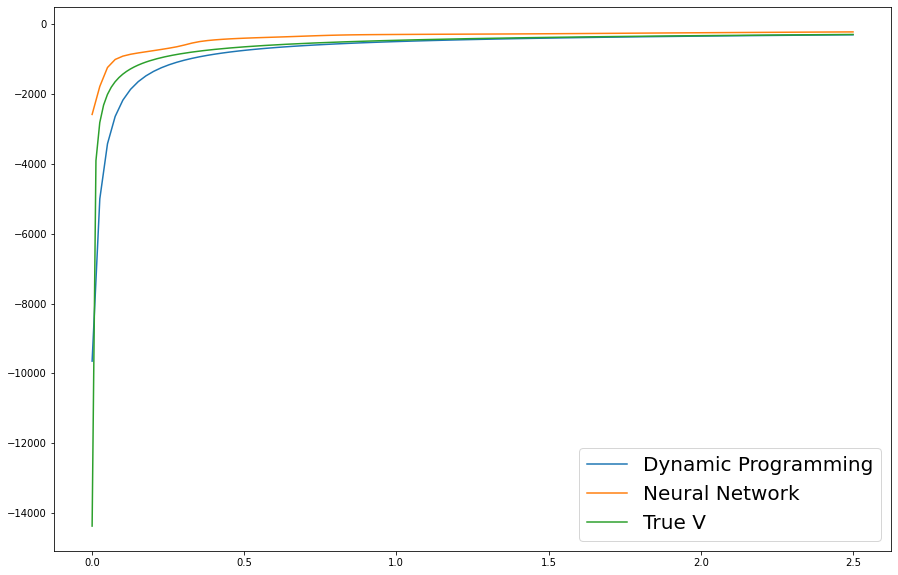

In [8]:
critic = QNetwork(state_dim=env.observation_space.shape[0],
                  action_dim=env.action_space.shape[0],
                  hidden_dim=cfg.CRITIC_HIDDEN_DIM,
                  num_hidden_layer=cfg.CRITIC_NUM_HIDDEN_LAYER,
                  activate=cfg.CRITIC_ACTIVATE,
                  batch_norm=cfg.CRITIC_BATCH_NORM,
                  weight_init=cfg.CRITIC_WEIGHT_INIT)

actor = env.c_star

critic_optim = optim.Adam(critic.parameters(), lr=cfg.MAX_CRITIC_LR)
actor_optim = _

agent = TargetAgent(env=env, critic=critic, actor=actor, critic_optim=critic_optim, actor_optim=actor_optim)

for i in range(10000):
    s = env.gen_states(sampling=True, B=32)
    a = agent.actor(s)
    r, s_ = env.transit(s, a, 10)
    a_ = agent.actor(s_)
#     data = [s, a, r, s_, a_, cfg.ENV_TRANSITION_NUM_STEPS]
    data = [s, a, r, s_, a_, 10]
    train_q_loss= agent.update_critic(data, lr_scheme(i)[0])
    if i % cfg.REPORT_PER_ITERATION == 0:
        print(f"Epoch {i}: lr {lr_scheme(i)[0]:.4f}, train loss {train_q_loss:.6f}\n")
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot(ax, dp, label='Dynamic Programming')
plot(ax, agent.critic, label='Neural Network')
s = np.linspace(cfg.ENV_STATE_SPACE_L, cfg.ENV_STATE_SPACE_H, 200)
ax.plot(s, env.v_star(s), label='True V')
ax.legend(fontsize=20);

## random sampling with trancated state (B=32)

Epoch 0: lr 0.0100, train loss 400.765442

Epoch 1000: lr 0.0100, train loss 1641.185303

Epoch 2000: lr 0.0100, train loss 1175.632568

Epoch 3000: lr 0.0100, train loss 495.144257

Epoch 4000: lr 0.0100, train loss 2514.680176

Epoch 5000: lr 0.0100, train loss 3874.953613

Epoch 6000: lr 0.0100, train loss 892.486328

Epoch 7000: lr 0.0100, train loss 2079.939697

Epoch 8000: lr 0.0100, train loss 5604.937012

Epoch 9000: lr 0.0100, train loss 2866.216309



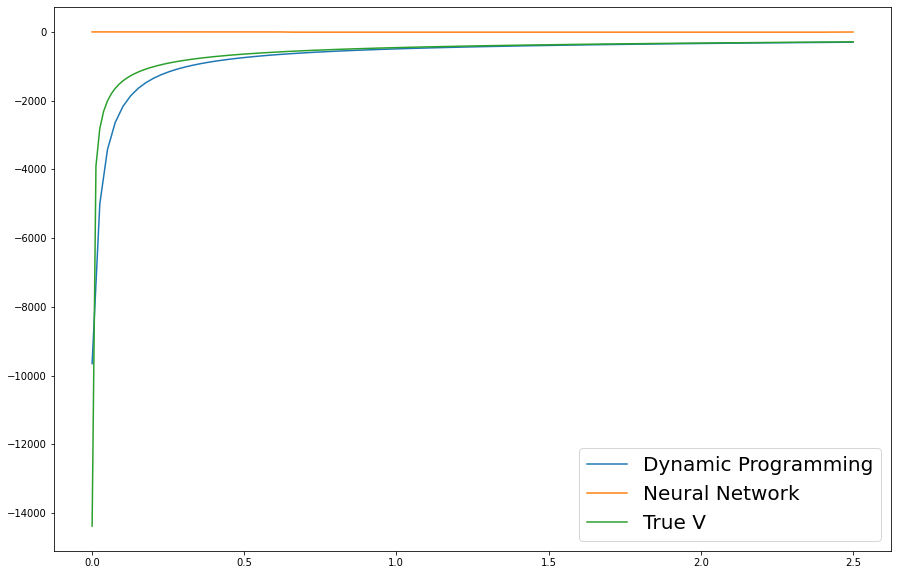

In [9]:
from sklearn.kernel_ridge import KernelRidge

critic = QNetwork(state_dim=env.observation_space.shape[0],
                  action_dim=env.action_space.shape[0],
                  hidden_dim=cfg.CRITIC_HIDDEN_DIM,
                  num_hidden_layer=cfg.CRITIC_NUM_HIDDEN_LAYER,
                  activate=cfg.CRITIC_ACTIVATE,
                  batch_norm=cfg.CRITIC_BATCH_NORM,
                  weight_init=cfg.CRITIC_WEIGHT_INIT)

actor = env.c_star

critic_optim = optim.Adam(critic.parameters(), lr=cfg.MAX_CRITIC_LR)
actor_optim = _

agent = SamplingAgent(env=env, critic=critic, actor=actor, critic_optim=critic_optim, actor_optim=actor_optim)

l = torch.tensor(env.observation_space.low)
u = torch.tensor(env.observation_space.high)
B = cfg.BATCH_SIZE
X = torch.zeros(10*B, 1)
y = torch.zeros(10*B, 1)

krr = KernelRidge(alpha=0.3, kernel='rbf')

def gen_importance(func, s):  # s is B*1
    scores = func.predict(s.detach().numpy()) + 1e-5
    normalized_scores = scores / (scores.sum())
    return torch.tensor(normalized_scores, dtype=torch.float32).reshape(s.shape)
                                  
for i in range(10000):
    j = i % 10
    if j == 0:
        krr.fit(X, y)
    s = torch.rand((B, 1)) * (u - l) + l
    a = agent.actor(s)
    r, s_ = env.transit(s, a, 1)
    a_ = agent.actor(s_)
    data = [s, a, r, s_, a_, 1]
    importance = gen_importance(krr, s)
    train_loss, train_losses = agent.update_critic(data, lr_scheme(i)[0], importance)
    
    X[j*B: (j+1)*B, :] = s.detach()
    y[j*B: (j+1)*B, :] = train_losses.detach()
    
    
    if i % cfg.REPORT_PER_ITERATION == 0:
        print(f"Epoch {i}: lr {lr_scheme(i)[0]:.4f}, train loss {train_loss:.6f}\n")
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot(ax, dp, label='Dynamic Programming')
plot(ax, agent.critic, label='Neural Network')
grid_s = np.linspace(cfg.ENV_STATE_SPACE_L, cfg.ENV_STATE_SPACE_H, 200)
ax.plot(grid_s, env.v_star(grid_s), label='True V')
ax.legend(fontsize=20);

In [ ]:
s = torch.rand((32, 1)) * (u - l) + l
a = agent.actor(s)
r, s_ = env.transit(s, a, 10)
a_ = agent.actor(s_)
data = [s, a, r, s_, a_, 10]
mean_train_q_loss, train_q_losses = agent.update_critic(data, lr_scheme(i)[0], IS_func)

In [ ]:
X = torch.zeros(10*32, 1)
y = torch.zeros(10*32, 1)
krr.fit(X, y)

In [ ]:
importance = gen_importance(krr, s)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(X.numpy().reshape(-1,), y.numpy().reshape(-1, ))
ax.scatter(X.numpy().reshape(-1,), y.numpy().reshape(-1, ))

In [ ]:
x = s.detach().numpy().reshape(-1,)
y = train_q_losses.detach().numpy().reshape(-1, )
yhat = gen_importance(krr, s)
fig, ax = plt.subplots(figsize=(15, 10))
#ax.scatter(x, y)
ax.scatter(x, yhat)

In [ ]:
train_q_losses.shape

In [ ]:
yhat.shape

In [ ]:
(train_q_losses * yhat).shape

# train both critic and actor

In [ ]:
critic = QNetwork(state_dim=env.observation_space.shape[0],
                  action_dim=env.action_space.shape[0],
                  hidden_dim=cfg.CRITIC_HIDDEN_DIM,
                  num_hidden_layer=cfg.CRITIC_NUM_HIDDEN_LAYER,
                  activate=cfg.CRITIC_ACTIVATE,
                  batch_norm=cfg.CRITIC_BATCH_NORM,
                  weight_init=cfg.CRITIC_WEIGHT_INIT)

actor = PolicyNetwork(state_dim=env.observation_space.shape[0],
                  action_dim=env.action_space.shape[0],
                  hidden_dim=cfg.ACTOR_HIDDEN_DIM,
                  num_hidden_layer=cfg.ACTOR_NUM_HIDDEN_LAYER,
                  activate=cfg.ACTOR_ACTIVATE,
                  batch_norm=cfg.ACTOR_BATCH_NORM,
                  weight_init=cfg.ACTOR_WEIGHT_INIT)

critic_optim = optim.Adam(critic.parameters(), lr=cfg.MAX_CRITIC_LR)
actor_optim = optim.Adam(actor.parameters(), lr=cfg.MAX_ACTOR_LR)

agent = TargetAgent(env=env, critic=critic, actor=actor, critic_optim=critic_optim, actor_optim=actor_optim)

for i in range(20000):
    s = env.gen_states(sampling=False, B=100)
    a = agent.actor(s)
    r, s_ = env.transit(s, a, 10)
    a_ = agent.tgt_actor(s_)
#     data = [s, a, r, s_, a_, cfg.ENV_TRANSITION_NUM_STEPS]
    data = [s, a, r, s_, a_, 10]
    train_q_loss= agent.update_critic(data, lr_scheme(i)[0])
    train_policy_loss = agent.update_actor(s, lr_scheme(i)[1])
    if i % cfg.REPORT_PER_ITERATION == 0:
        print(f"Epoch {i}: lr {lr_scheme(i)[0]:.4f}, train q loss {train_q_loss:.6f}\n \
              train policy loss {train_policy_loss:.6f}")
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot(ax, dp, label='Dynamic Programming')
plot(ax, agent.critic, label='Neural Network')
s = np.linspace(cfg.ENV_STATE_SPACE_L, cfg.ENV_STATE_SPACE_H, 200)
ax.plot(s, env.v_star(s), label='True V')
ax.legend(fontsize=20);